<a href="https://colab.research.google.com/github/royn5618/Talks_Resources/blob/main/DSCF_NLP_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['figure.figsize'] = [10,10]
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load Data

In [ ]:
train_df = pd.read_csv('Data/sample.csv')

# Basic EDA

In [ ]:
# Check N rows from the beginning
N = 5
train_df.head(N) # default is 5

,id,title,author,text,label
0,19663,Ex-SEAL Member Who Wrote Book on Bin Laden Rai...,Christopher Drew,"Matt Bissonnette, a former member of Navy SEAL...",0
1,5501,"Nominee for Interior Vows to Preserve, and Dev...",Emmarie Huetteman,"WASHINGTON — Representative Ryan Zinke, Rep...",0
2,12888,The End of Interventionism?,Daniel McAdams,Share This \nLooking over the global landscape...,1
3,18442,Saudis Foil ISIS Terror Attacks on Packed Stadium,Catherine Shakdam,Saudi Arabia says it has thwarted two ISIS ter...,1
4,18930,Anthony Weiner rides through sex addiction reh...,wmw_admin,"By wmw_admin on November 5, 2016 Rebecca Rosen...",1


In [ ]:
# info() - Used to check number of rows, non-null values and data types of each column
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      100 non-null    int64 
 1   title   98 non-null     object
 2   author  90 non-null     object
 3   text    100 non-null    object
 4   label   100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


In [ ]:
# Drop any NA values
train_df.dropna(axis=0, how='any',inplace=True)

In [ ]:
# Recheck Info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      88 non-null     int64 
 1   title   88 non-null     object
 2   author  88 non-null     object
 3   text    88 non-null     object
 4   label   88 non-null     object
dtypes: int64(1), object(4)
memory usage: 4.1+ KB


# Text Length Check

In [ ]:
# apply Lambda Function - use len()
train_df['raw_text_length'] = train_df['text'].apply(lambda x: len(x))

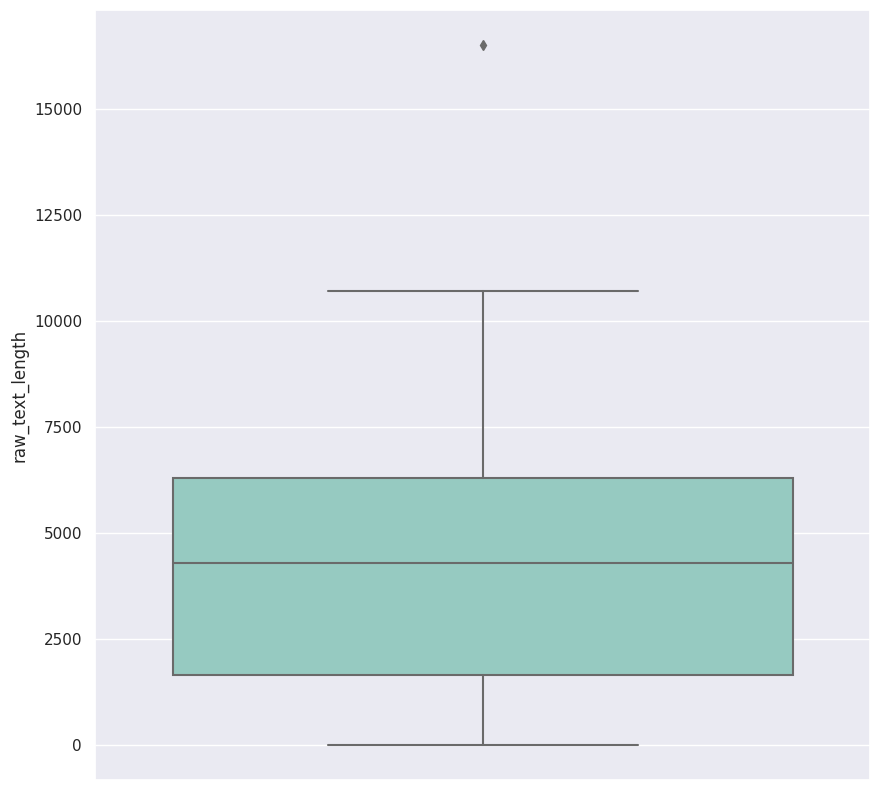

In [ ]:
sns.boxplot(y='raw_text_length', data=train_df, palette="Set3")
plt.show()

In [ ]:
train_df['raw_text_length'].describe()

count       88.000000
mean      4448.250000
std       3194.825972
min          1.000000
25%       1659.750000
50%       4292.000000
75%       6307.250000
max      16522.000000
Name: raw_text_length, dtype: float64

In [ ]:
# Explore the Texts with length 1
train_df[train_df['raw_text_length']==1].shape

(2, 6)

In [ ]:
train_df['text'] = train_df['text'].str.strip() # strip function removed all whitespaces

In [ ]:
train_df['raw_text_length'] = train_df['text'].apply(lambda x: len(x))
train_df[train_df['raw_text_length']==0].shape # All blanks reduced to 0

(2, 6)

In [ ]:
train_df['raw_text_length'].describe()

count       88.000000
mean      4447.897727
std       3195.047454
min          0.000000
25%       1658.250000
50%       4292.000000
75%       6306.000000
max      16522.000000
Name: raw_text_length, dtype: float64

In [ ]:
train_df[train_df['raw_text_length'] < 100].shape # All blanks reduced to 0

(2, 6)

In [ ]:
train_df_ = train_df[train_df['raw_text_length'] > 100].copy()

In [ ]:
train_df_['raw_text_length'].describe()

count       86.000000
mean      4551.337209
std       3157.878646
min        195.000000
25%       1958.250000
50%       4324.500000
75%       6436.000000
max      16522.000000
Name: raw_text_length, dtype: float64

# Using Regex

In [ ]:
import re

In [ ]:
text_sample = train_df_['text'][1]
text_sample

'WASHINGTON  —   Representative Ryan Zinke, Republican of Montana, pitched himself on Tuesday as a serious steward of federal resources in his confirmation hearing for interior secretary, frequently bucking conservative orthodoxy on ownership of public lands, federal funding for preservation and even, briefly, climate change. But Mr. Zinke also emphasized his support for drilling, mining and logging on federal lands, activities strongly opposed by many environmental groups. In   testimony before a Senate panel that lasted nearly four hours, Mr. Zinke, a former member of the Navy SEALs who just finished his first term in the House, tried to balance the importance of preservation with use of the nation’s public lands and waters. He expressed admiration for Gifford Pinchot, the first United States Forest Service chief, who advocated planned use and renewal. Mr. Zinke also said he supported energy development on federal lands. Recreational activities and mining, for instance, are not mutua

In [ ]:
cleaned_text = re.sub(r'[^a-zA-Z\d\s\’]+', ' ', text_sample) # Keep alphabets, digits, spaces and single quotes
cleaned_text

'WASHINGTON      Representative Ryan Zinke  Republican of Montana  pitched himself on Tuesday as a serious steward of federal resources in his confirmation hearing for interior secretary  frequently bucking conservative orthodoxy on ownership of public lands  federal funding for preservation and even  briefly  climate change  But Mr  Zinke also emphasized his support for drilling  mining and logging on federal lands  activities strongly opposed by many environmental groups  In   testimony before a Senate panel that lasted nearly four hours  Mr  Zinke  a former member of the Navy SEALs who just finished his first term in the House  tried to balance the importance of preservation with use of the nation’s public lands and waters  He expressed admiration for Gifford Pinchot  the first United States Forest Service chief  who advocated planned use and renewal  Mr  Zinke also said he supported energy development on federal lands  Recreational activities and mining  for instance  are not mutua

Single quotes are preserved because we can expand on the "contracted" words.

# Tokenization

In [ ]:
print([cleaned_text.split(' ')])

[['WASHINGTON', '', '', '', '', '', 'Representative', 'Ryan', 'Zinke', '', 'Republican', 'of', 'Montana', '', 'pitched', 'himself', 'on', 'Tuesday', 'as', 'a', 'serious', 'steward', 'of', 'federal', 'resources', 'in', 'his', 'confirmation', 'hearing', 'for', 'interior', 'secretary', '', 'frequently', 'bucking', 'conservative', 'orthodoxy', 'on', 'ownership', 'of', 'public', 'lands', '', 'federal', 'funding', 'for', 'preservation', 'and', 'even', '', 'briefly', '', 'climate', 'change', '', 'But', 'Mr', '', 'Zinke', 'also', 'emphasized', 'his', 'support', 'for', 'drilling', '', 'mining', 'and', 'logging', 'on', 'federal', 'lands', '', 'activities', 'strongly', 'opposed', 'by', 'many', 'environmental', 'groups', '', 'In', '', '', 'testimony', 'before', 'a', 'Senate', 'panel', 'that', 'lasted', 'nearly', 'four', 'hours', '', 'Mr', '', 'Zinke', '', 'a', 'former', 'member', 'of', 'the', 'Navy', 'SEALs', 'who', 'just', 'finished', 'his', 'first', 'term', 'in', 'the', 'House', '', 'tried', 'to

**What Else:**

1. Try strip
2. Try removing anything with length 1

# Contractions

In [ ]:
test = "It's not their, it's they're"

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.8 MB/s eta 0:00:00


In [ ]:
import contractions
contractions.fix(test)

'It is not their, it is they are'

In [ ]:
contractions.fix(cleaned_text)

'WASHINGTON      Representative Ryan Zinke  Republican of Montana  pitched himself on Tuesday as a serious steward of federal resources in his confirmation hearing for interior secretary  frequently bucking conservative orthodoxy on ownership of public lands  federal funding for preservation and even  briefly  climate change  But Mr  Zinke also emphasized his support for drilling  mining and logging on federal lands  activities strongly opposed by many environmental groups  In   testimony before a Senate panel that lasted nearly four hours  Mr  Zinke  a former member of the Navy SEALs who just finished his first term in the House  tried to balance the importance of preservation with use of the nation’s public lands and waters  He expressed admiration for Gifford Pinchot  the first United States Forest Service chief  who advocated planned use and renewal  Mr  Zinke also said he supported energy development on federal lands  Recreational activities and mining  for instance  are not mutua

**What else:**

At this stage you can remove the single quotes and again - for the stray s or d, remove single length strings/tokens.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
print(word_tokenize(cleaned_text))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['WASHINGTON', 'Representative', 'Ryan', 'Zinke', 'Republican', 'of', 'Montana', 'pitched', 'himself', 'on', 'Tuesday', 'as', 'a', 'serious', 'steward', 'of', 'federal', 'resources', 'in', 'his', 'confirmation', 'hearing', 'for', 'interior', 'secretary', 'frequently', 'bucking', 'conservative', 'orthodoxy', 'on', 'ownership', 'of', 'public', 'lands', 'federal', 'funding', 'for', 'preservation', 'and', 'even', 'briefly', 'climate', 'change', 'But', 'Mr', 'Zinke', 'also', 'emphasized', 'his', 'support', 'for', 'drilling', 'mining', 'and', 'logging', 'on', 'federal', 'lands', 'activities', 'strongly', 'opposed', 'by', 'many', 'environmental', 'groups', 'In', 'testimony', 'before', 'a', 'Senate', 'panel', 'that', 'lasted', 'nearly', 'four', 'hours', 'Mr', 'Zinke', 'a', 'former', 'member', 'of', 'the', 'Navy', 'SEALs', 'who', 'just', 'finished', 'his', 'first', 'term', 'in', 'the', 'House', 'tried', 'to', 'balance', 'the', 'importance', 'of', 'preservation', 'with', 'use', 'of', 'the', 'nat

In [ ]:
print(word_tokenize(text_sample))

['WASHINGTON', '—', 'Representative', 'Ryan', 'Zinke', ',', 'Republican', 'of', 'Montana', ',', 'pitched', 'himself', 'on', 'Tuesday', 'as', 'a', 'serious', 'steward', 'of', 'federal', 'resources', 'in', 'his', 'confirmation', 'hearing', 'for', 'interior', 'secretary', ',', 'frequently', 'bucking', 'conservative', 'orthodoxy', 'on', 'ownership', 'of', 'public', 'lands', ',', 'federal', 'funding', 'for', 'preservation', 'and', 'even', ',', 'briefly', ',', 'climate', 'change', '.', 'But', 'Mr.', 'Zinke', 'also', 'emphasized', 'his', 'support', 'for', 'drilling', ',', 'mining', 'and', 'logging', 'on', 'federal', 'lands', ',', 'activities', 'strongly', 'opposed', 'by', 'many', 'environmental', 'groups', '.', 'In', 'testimony', 'before', 'a', 'Senate', 'panel', 'that', 'lasted', 'nearly', 'four', 'hours', ',', 'Mr.', 'Zinke', ',', 'a', 'former', 'member', 'of', 'the', 'Navy', 'SEALs', 'who', 'just', 'finished', 'his', 'first', 'term', 'in', 'the', 'House', ',', 'tried', 'to', 'balance', 'th

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize

print(sent_tokenize(cleaned_text))

['WASHINGTON      Representative Ryan Zinke  Republican of Montana  pitched himself on Tuesday as a serious steward of federal resources in his confirmation hearing for interior secretary  frequently bucking conservative orthodoxy on ownership of public lands  federal funding for preservation and even  briefly  climate change  But Mr  Zinke also emphasized his support for drilling  mining and logging on federal lands  activities strongly opposed by many environmental groups  In   testimony before a Senate panel that lasted nearly four hours  Mr  Zinke  a former member of the Navy SEALs who just finished his first term in the House  tried to balance the importance of preservation with use of the nation’s public lands and waters  He expressed admiration for Gifford Pinchot  the first United States Forest Service chief  who advocated planned use and renewal  Mr  Zinke also said he supported energy development on federal lands  Recreational activities and mining  for instance  are not mutu

**Q** Why is this not working?

**Try** using this on text_sample.

# Normalizing

 - Case Conversion
 - Stemming
 - Lemmatization

## Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
ps = PorterStemmer()

In [ ]:
ps.stem('Tweeted')

'tweet'

In [ ]:
ps.stem('American')

'american'

In [ ]:
ps.stem('Subscribe')

'subscrib'

In [ ]:
words = ['American', 'Subscribe', 'courtesy', 'important']
for each_word in words:
  print(f"{each_word}:{ps.stem(each_word)}")

American:american
Subscribe:subscrib
courtesy:courtesi
important:import


## Lemmatization

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lm = WordNetLemmatizer()

In [ ]:
words = ['Tweeted', 'American', 'Subscribe', 'courtesy', 'important']
for each_word in words:
  print(f"{each_word}:{lm.lemmatize(each_word.lower())}")

Tweeted:tweeted
American:american
Subscribe:subscribe
courtesy:courtesy
important:important


In [ ]:
words = ['Tweeted', 'American', 'Subscribe', 'courtesy', 'important']
for each_word in words:
  print(f"{each_word}:{lm.lemmatize(each_word.lower(), pos='v')}")

Tweeted:tweet
American:american
Subscribe:subscribe
courtesy:courtesy
important:important


In [ ]:
lm.lemmatize('tweeted', pos='v')

'tweet'

# Taggers

- POS - Parts of Speech
- NER - Named Entity Recognition

## POS Tag

In [ ]:
nltk.download('averaged_perceptron_tagger') # Required package

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.pos_tag(['tweeted'])

[('tweeted', 'VBN')]

In [ ]:
nltk.pos_tag(word_tokenize(cleaned_text)[:10])  #  To view only first 10 words

[('WASHINGTON', 'NNP'),
 ('Representative', 'NNP'),
 ('Ryan', 'NNP'),
 ('Zinke', 'NNP'),
 ('Republican', 'NNP'),
 ('of', 'IN'),
 ('Montana', 'NNP'),
 ('pitched', 'VBD'),
 ('himself', 'PRP'),
 ('on', 'IN')]

**Try** applying on the other forms of sample text like the text_sample, and split the sample by whitespace.

## NER Tag

In [ ]:
!pip install svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.0 MB/s eta 0:00:00


In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
list(nltk.ne_chunk(nltk.pos_tag(word_tokenize(cleaned_text)[:10])))

[Tree('ORGANIZATION', [('WASHINGTON', 'NNP')]),
 ('Representative', 'NNP'),
 Tree('PERSON', [('Ryan', 'NNP'), ('Zinke', 'NNP'), ('Republican', 'NNP')]),
 ('of', 'IN'),
 Tree('PERSON', [('Montana', 'NNP')]),
 ('pitched', 'VBD'),
 ('himself', 'PRP'),
 ('on', 'IN')]

In [ ]:
## Uncomment and try this
# nltk.ne_chunk(nltk.pos_tag(word_tokenize(cleaned_text)[:10]))

**Try** converting cleaned_text to lower case.

# SpaCy

In [ ]:
!pip install spacy

In [ ]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
doc = nlp(text_sample)
doc

WASHINGTON  —   Representative Ryan Zinke, Republican of Montana, pitched himself on Tuesday as a serious steward of federal resources in his confirmation hearing for interior secretary, frequently bucking conservative orthodoxy on ownership of public lands, federal funding for preservation and even, briefly, climate change. But Mr. Zinke also emphasized his support for drilling, mining and logging on federal lands, activities strongly opposed by many environmental groups. In   testimony before a Senate panel that lasted nearly four hours, Mr. Zinke, a former member of the Navy SEALs who just finished his first term in the House, tried to balance the importance of preservation with use of the nation’s public lands and waters. He expressed admiration for Gifford Pinchot, the first United States Forest Service chief, who advocated planned use and renewal. Mr. Zinke also said he supported energy development on federal lands. Recreational activities and mining, for instance, are not mutual

In [ ]:
for token in doc:
  print('LEMMA')
  print(token.lemma_)
  print()
  print('POS')
  print(token.pos_)
  print()
  print('TAG')
  print(token.tag_)
  break

LEMMA
WASHINGTON

POS
PROPN

TAG
NNP


In [ ]:
for ent in doc.ents:
  print(ent.text, ent.start_char, ent.end_char, ent.label_)
  break

WASHINGTON 0 10 GPE


# WordCloud

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
train_df_

,id,title,author,text,label,raw_text_length
0,19663,Ex-SEAL Member Who Wrote Book on Bin Laden Rai...,Christopher Drew,"Matt Bissonnette, a former member of Navy SEAL...",0,4611
1,5501,"Nominee for Interior Vows to Preserve, and Dev...",Emmarie Huetteman,"WASHINGTON — Representative Ryan Zinke, Rep...",0,4858
2,12888,The End of Interventionism?,Daniel McAdams,Share This \nLooking over the global landscape...,1,5194
3,18442,Saudis Foil ISIS Terror Attacks on Packed Stadium,Catherine Shakdam,Saudi Arabia says it has thwarted two ISIS ter...,1,2045
4,18930,Anthony Weiner rides through sex addiction reh...,wmw_admin,"By wmw_admin on November 5, 2016 Rebecca Rosen...",1,3644
...,...,...,...,...,...,...
93,15674,Dennis Kucinich’s Extraordinary Warning on D.C...,wmw_admin,"By wmw_admin on October 29, 2016 Michael Krieg...",1,8510
94,14115,The Possible Identity of the 3 Ribs,Jordan Stringfellow,The Possible Identity of the 3 Ribs Bones of C...,1,2099
95,1236,Rigged Election: Hillary & Trump Caught Partyi...,Editor,"By Covert Geopolitics\nWe have been very, very...",1,9434
98,9429,Obama Knew About Clinton's Server; Lied To Ame...,C. Mitchell Shaw,Email \nHillary Clinton and her close cohorts ...,1,8582


In [ ]:
all_text = " ".join(list(train_df_['text']))

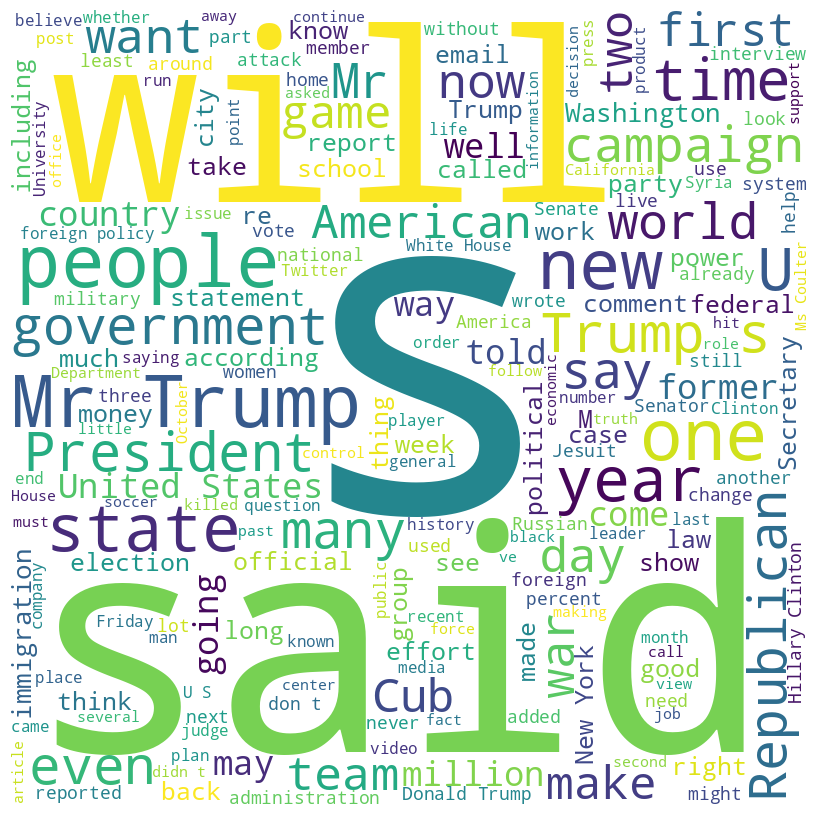

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(all_text)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
def basic_preprocessing(input_text):
  """
  Remove any special character including punctuation, all single characters,
  and stopwords.
  """
  output_text = []
  list_tokens = word_tokenize(input_text)
  for each_token in list_tokens:
    if len(each_token.strip()) <= 1 or each_token.strip() in STOPWORDS:
      continue
    output_text.append(each_token.strip())
  return output_text


In [ ]:
prepped_text = basic_preprocessing(all_text)

In [ ]:
wordcloud_input = " ".join(prepped_text)

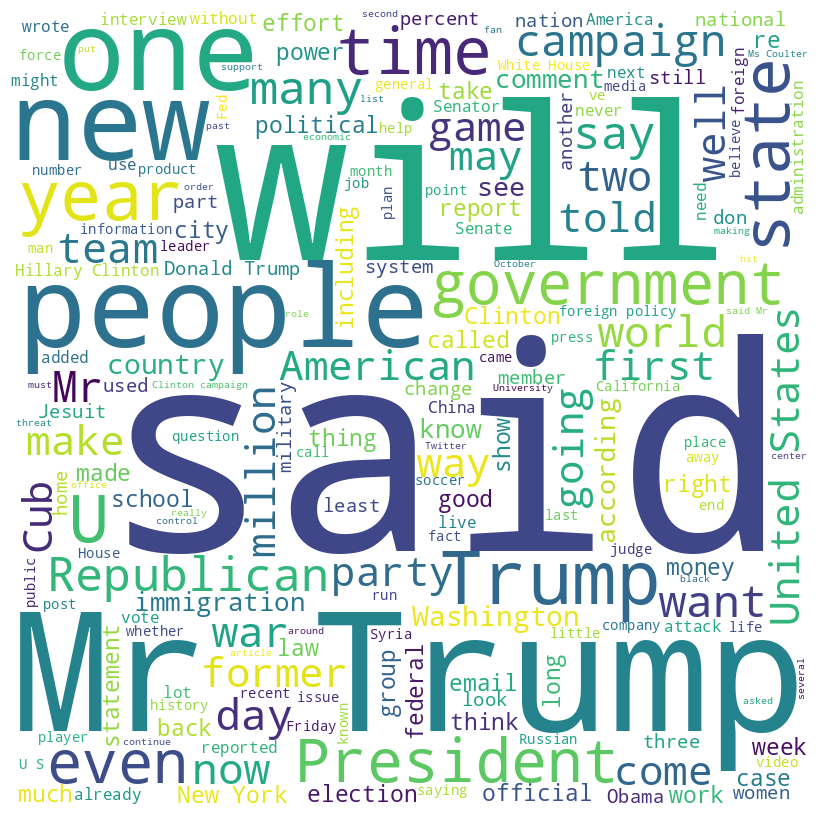

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(wordcloud_input)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


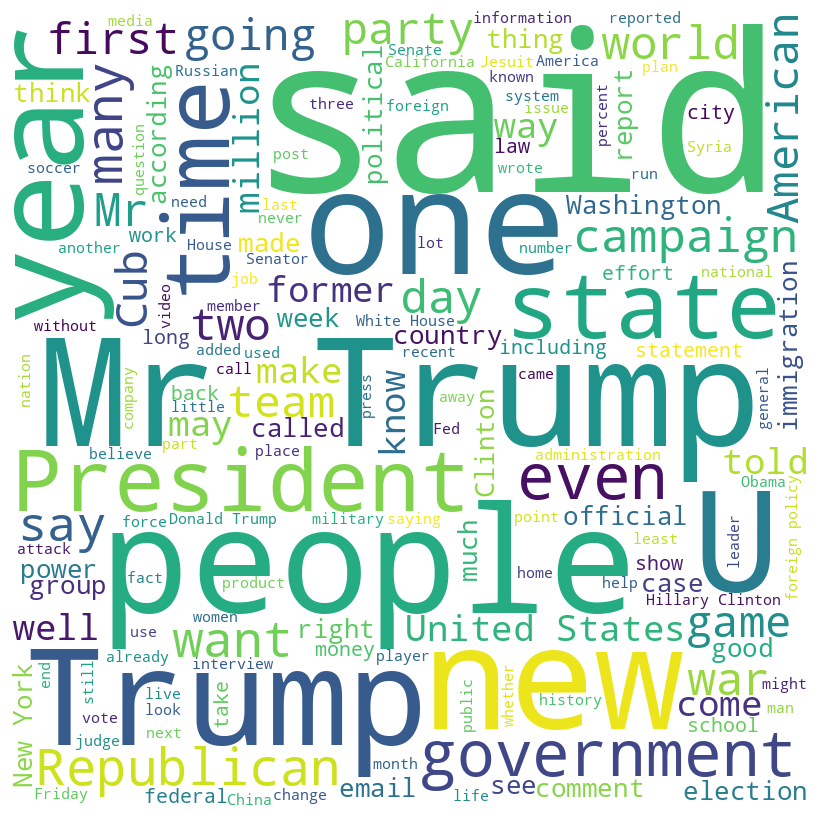

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_ = stopwords.words('english')

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords_,
                min_font_size = 10).generate(wordcloud_input)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

**Try**

1. Analyazing the whole dataset
2. Build a Text Processing Pipeline